In [95]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping

from tensorflow.keras import layers, models, optimizers
#from tensorflow.keras.applications.EfficientNetB4 import preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.metrics import  classification_report

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4


import matplotlib.pyplot as plt
import numpy as np


In [96]:
file_path = '/kaggle/input/skin-cancer-malignant-vs-benign/train'

In [97]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [98]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [99]:
filepaths

['/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/764.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/1700.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/1786.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/1075.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/771.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/208.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/1789.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/473.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/1792.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/1411.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/1031.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/1749.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/1501.jpg',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign/1385.jp

In [100]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [101]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
1,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
2,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
3,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
4,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign


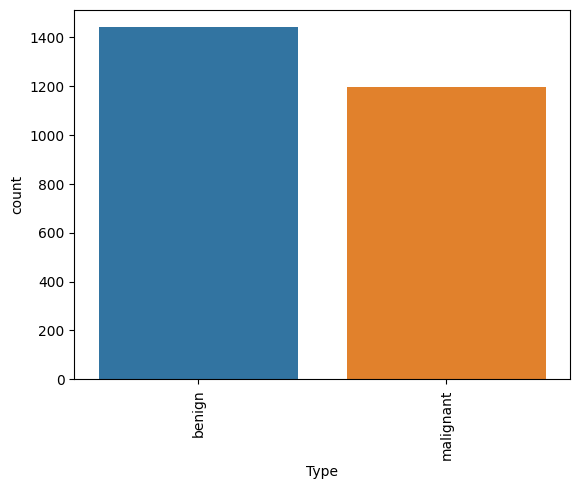

In [102]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [103]:
train, test = train_test_split(data, test_size=25, random_state=42)

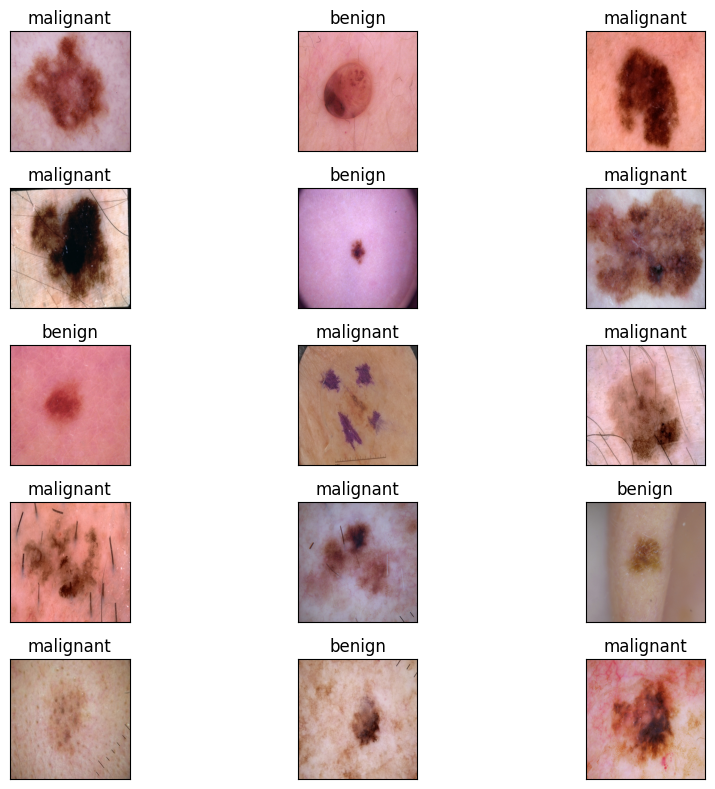

In [104]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [105]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [106]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,    
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2612 validated image filenames belonging to 2 classes.
Found 25 validated image filenames belonging to 2 classes.
Found 25 validated image filenames belonging to 2 classes.


In [107]:
pretrained_model = EfficientNetB4(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

71686520/71686520 [==============================] - 3s 0us/step


In [108]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [109]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [110]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [111]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100


2024-04-01 06:41:46.156111: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_4/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


82/82 [==============================] - 22s 114ms/step - loss: 0.5282 - accuracy: 0.7385 - val_loss: 0.3364 - val_accuracy: 0.8800
Epoch 2/100
82/82 [==============================] - 6s 74ms/step - loss: 0.4551 - accuracy: 0.7822 - val_loss: 0.2914 - val_accuracy: 0.9200
Epoch 3/100
82/82 [==============================] - 6s 70ms/step - loss: 0.4146 - accuracy: 0.8128 - val_loss: 0.2612 - val_accuracy: 0.9200
Epoch 4/100
82/82 [==============================] - 6s 68ms/step - loss: 0.3941 - accuracy: 0.8204 - val_loss: 0.2471 - val_accuracy: 0.9200
Epoch 5/100
82/82 [==============================] - 6s 69ms/step - loss: 0.3880 - accuracy: 0.8170 - val_loss: 0.2125 - val_accuracy: 0.9200
Epoch 6/100
82/82 [==============================] - 6s 70ms/step - loss: 0.3742 - accuracy: 0.8335 - val_loss: 0.2062 - val_accuracy: 0.9200
Epoch 7/100
82/82 [==============================] - 6s 69ms/step - loss: 0.3606 - accuracy: 0.8270 - val_loss: 0.2083 - val_accuracy: 0.9200
Epoch 8/100
82/8

In [112]:
model.save("model_EfficientNetB4_Maligant_vs_Benign_75to25_.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [113]:
from keras.models import load_model
model = load_model("/kaggle/working/model_EfficientNetB4_Maligant_vs_Benign.h5")

OSError: No file or directory found at /kaggle/working/model_EfficientNetB4_Maligant_vs_Benign.h5

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("/kaggle/working/model_EfficientNetB4_Maligant_vs_Benign.h5")
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions